In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib.font_manager import FontProperties

In [2]:
def convertToArray(string):
    string = string.strip('[]')
    output = [int(i) for i in string.split(', ')]
    return output

In [3]:
test = pd.read_csv('test.csv')
predsV = pd.read_csv('predictions_vanilla/predictions.csv')
predsA = pd.read_csv('predictions_attention/predictions.csv')

In [6]:
sum(predsV['hi']==predsV['hi_preds'])/len(predsV)

0.39649044868947136

In [7]:
sum(predsA['hi']==predsA['hi_preds'])/len(predsA)

0.42025766326077296

In [8]:
test['hi'] = test['hi'].apply(convertToArray).apply(lambda x: x[1:])
test['en'] = test['en'].apply(convertToArray)

In [9]:
with open('predictions_attention/connectivity.npy',"rb") as f:
    connectivity = np.load(f)

In [10]:
with open('predictions_attention/attention_score.npy',"rb") as f:
    attention_scores = np.load(f)

In [11]:
with open('dict.json', 'r') as f:
        outputDict = json.load(f)
        outputDict['en'] = {outputDict['en'][i]: i for i in outputDict['en']}
        outputDict['hi'] = {outputDict['hi'][i]: i for i in outputDict['hi']}

In [12]:
fp = FontProperties(fname = "nirmala.ttf")

# Vanilla Prediction Analysis 

In [67]:
index = [3359, 2210, 3834, 3413, 1533, 3379,2856, 646,2460,3826]

In [68]:
sample_output = predsV.iloc[index]#.sample(10)

In [69]:
style = (sample_output['hi']==sample_output['hi_preds']).replace({True:'background: green',
                                                         False:'background: red'})

In [99]:
sample_output[['en','hi','hi_preds']].style.apply(lambda x: [None,"background: green"] if x['hi']==x['hi_preds'] else [None,"background: red"],
                          subset=['hi','hi_preds'],axis=1)

,en,hi,hi_preds
3359,raghupati,रघुपति,रघुपति
2210,patiya,पटिया,पटिया
3834,wed,वेड,वेद
3413,radhe,राधे,राधे
1533,taiboo,टैबू,ताब्बू
3379,rahamat,रहमत,रहमत
2856,benwar,बेंवर,बेनवर
646,aurangabad,औरंगाबाद,औरंगाबाद
2460,pratishat,प्रतिशत,प्रतिषात
3826,viresh,वीरेश,विरेश


In [71]:
indDict = {outputDict['hi'][i]:i for i in outputDict['hi']}

In [72]:
predsV['hi_consonents'] = predsV['hi'].apply(lambda x:[indDict[i] for i in x if indDict[i]>4 and indDict[i]<50])
predsV['hi_vowels'] = predsV['hi'].apply(lambda x:[indDict[i] for i in x if indDict[i]>49 or indDict[i]<5])

In [73]:
predsV['hi_consonents_preds'] = predsV['hi_preds'].apply(lambda x:[indDict[i] for i in x if indDict[i]>4 and indDict[i]<50])
predsV['hi_vowels_preds'] = predsV['hi_preds'].apply(lambda x:[indDict[i] for i in x if indDict[i]>49 or indDict[i]<5])

In [74]:
sum(predsV['hi_consonents']==predsV['hi_consonents_preds'])/len(predsV)

0.7083518436250555

In [75]:
sum(predsV['hi_vowels']==predsV['hi_vowels_preds'])/len(predsV)

0.4848956019546868

In [76]:
predsV['len']=predsV['en'].apply(len)

In [77]:
predsV['correct'] = predsV['hi']==predsV['hi_preds']

In [78]:
predsV.groupby(by='len')['correct'].apply(lambda x:sum(x)/len(x))

len
2     0.421053
3     0.349206
4     0.383378
5     0.401857
6     0.435216
7     0.388614
8     0.399031
9     0.402844
10    0.348548
11    0.330709
12    0.313433
13    0.321429
14    0.333333
15    0.500000
16    0.750000
Name: correct, dtype: float64

In [82]:
sample_output[sample_output['hi']!=sample_output['hi_preds']][['hi','hi_preds']]

,hi,hi_preds
3834,वेड,वेद
1533,टैबू,ताब्बू
2856,बेंवर,बेनवर
2460,प्रतिशत,प्रतिषात
3826,वीरेश,विरेश


In [113]:
i = (predsV['hi']!=predsV['hi_preds'])&(predsA['hi']==predsA['hi_preds'])

In [114]:
compare = predsV[i][['en','hi','hi_preds']]

In [115]:
compare['hi_preds_attention']=predsA.loc[i,'hi_preds']

In [117]:
compare.sample(10)

,en,hi,hi_preds,hi_preds_attention
916,khat,खत,खात,खत
1429,julus,जूलूस,जुलूस,जूलूस
2112,nirbaadh,निर्बाध,निर्बाद,निर्बाध
3596,lahlahaati,लहलहाती,लहलाहाटी,लहलहाती
2347,pipraa,पिपरा,पिप्र,पिपरा
3142,maange,मांगे,मांगें,मांगे
720,karanj,करंज,करणज,करंज
894,clay,क्ले,क्लाय,क्ले
2087,niketan,निकेतन,निकेटन,निकेतन
4346,straws,स्ट्रास,स्ट्रांव,स्ट्रास


In [118]:
predsA['hi_consonents'] = predsA['hi'].apply(lambda x:[indDict[i] for i in x if indDict[i]>4 and indDict[i]<50])
predsA['hi_vowels'] = predsA['hi'].apply(lambda x:[indDict[i] for i in x if indDict[i]>49 or indDict[i]<5])

In [119]:
predsA['hi_consonents_preds'] = predsA['hi_preds'].apply(lambda x:[indDict[i] for i in x if indDict[i]>4 and indDict[i]<50])
predsA['hi_vowels_preds'] = predsA['hi_preds'].apply(lambda x:[indDict[i] for i in x if indDict[i]>49 or indDict[i]<5])

In [ ]:
sum(predsV['hi_consonents']==predsV['hi_consonents_preds'])/len(predsV)

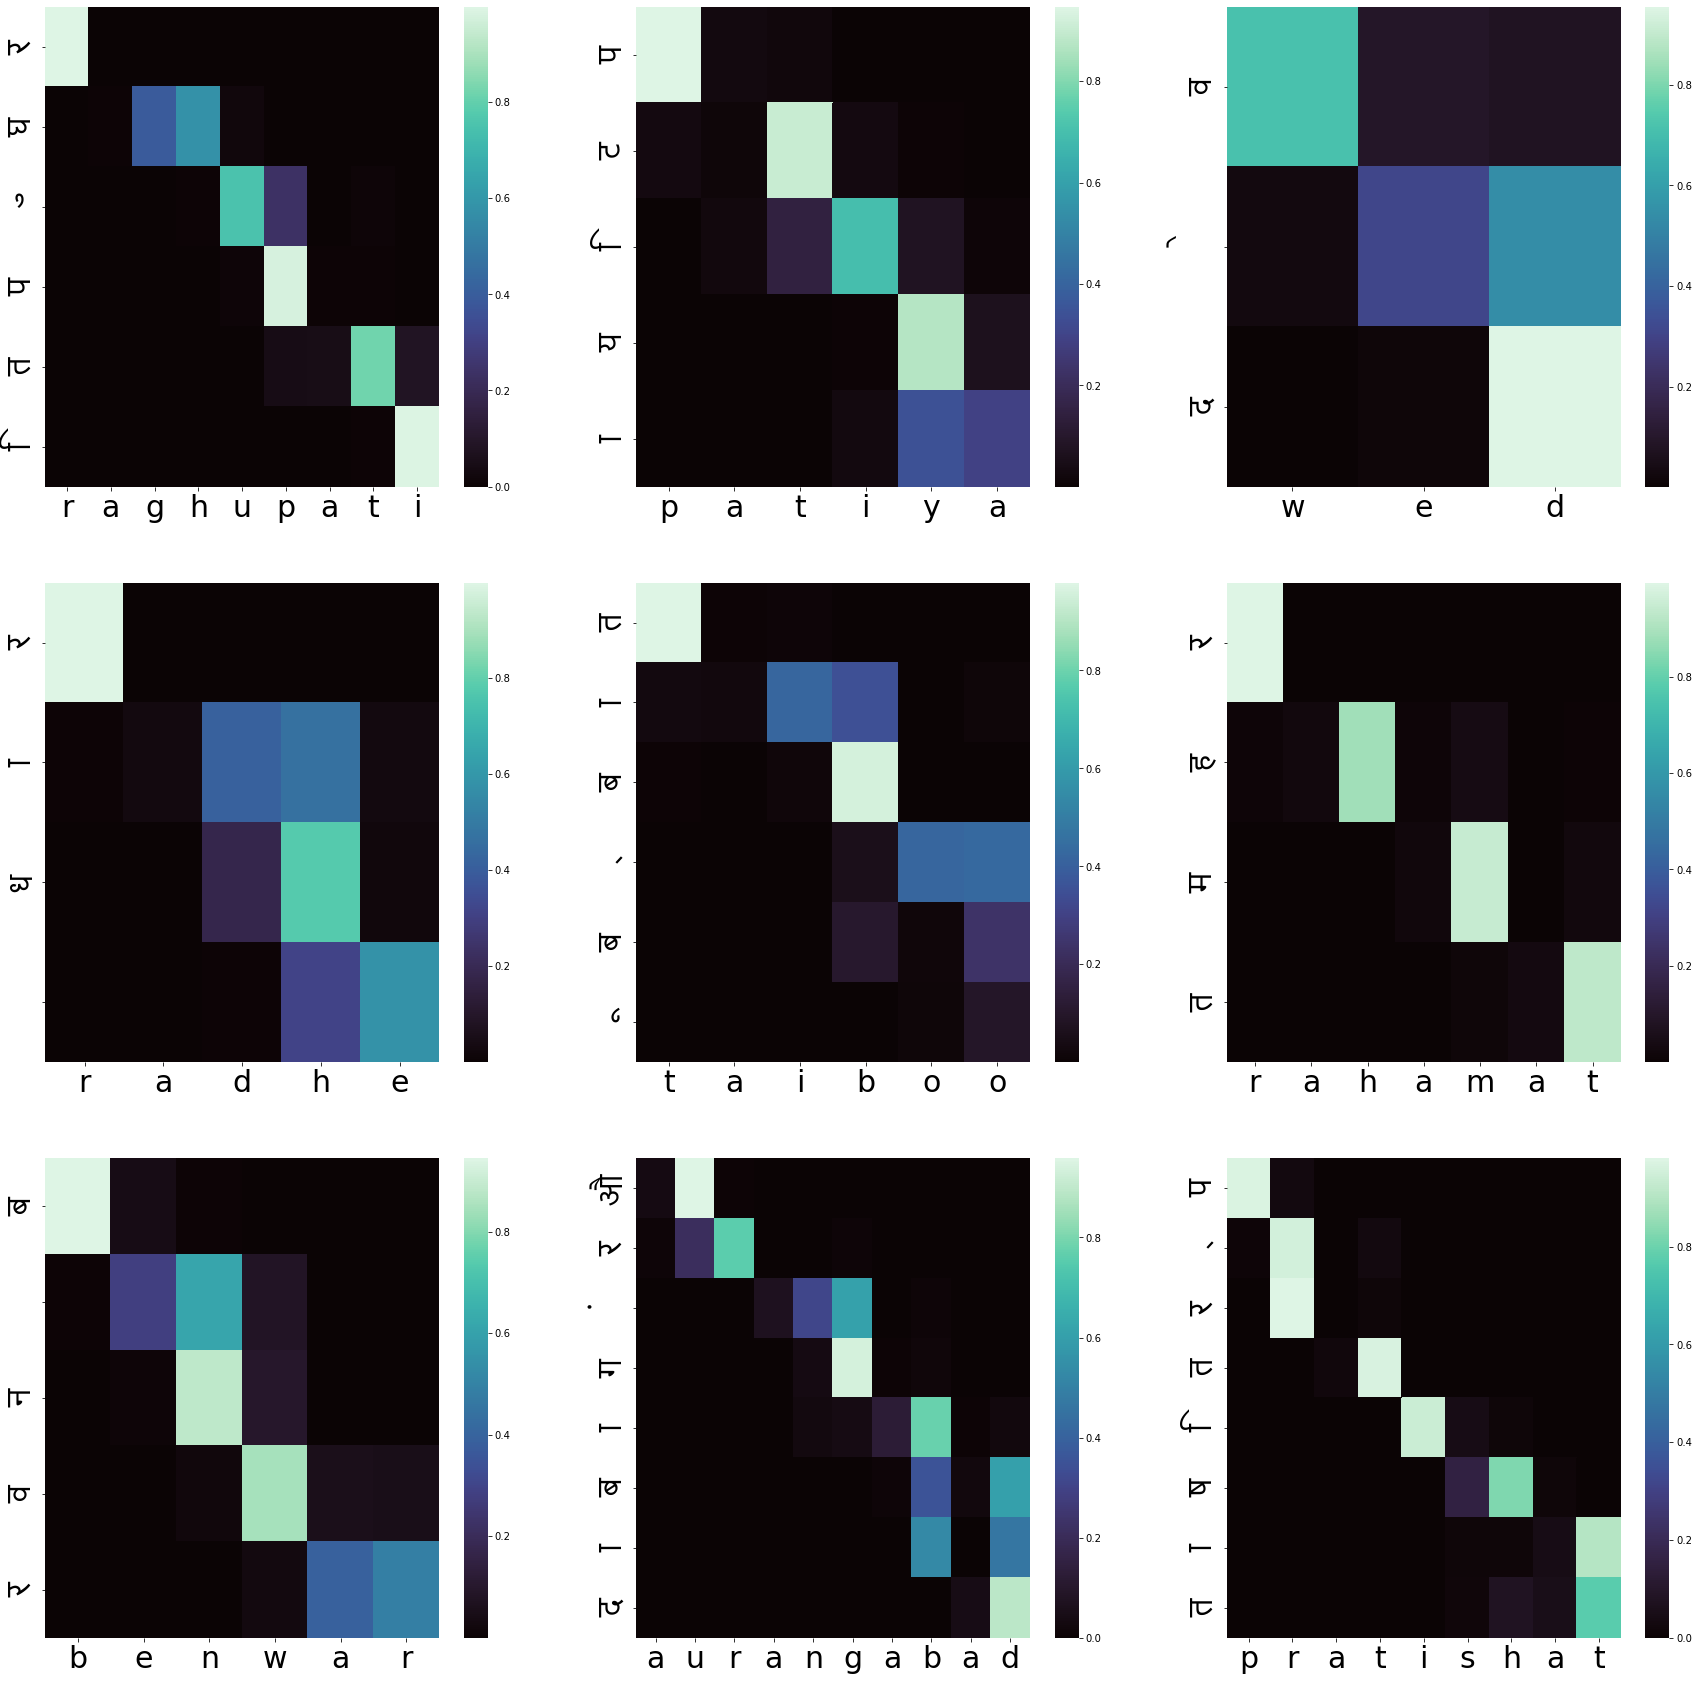

In [87]:
fig, ax = plt.subplots(3, 3,figsize=(30,30))

for i in range(3):
    for j in range(3):
        
        k=index[3*i+j]
        
        new_ax = sns.heatmap(
            attention_scores[k,:len(predsV.iloc[k]['hi_preds']),-len(predsV.iloc[k]['en'])-1:-1],
            ax=ax[i][j],
            cmap='mako'
        )
        
        new_ax.set_xticklabels(
            [l for l in predsV.iloc[k]['en']]
        )
        
        new_ax.set_yticklabels(
            [l for l in predsV.iloc[k]['hi_preds']]
        )
        
        for label in new_ax.get_xticklabels() :
            label.set_fontsize(30)
        
        for label in new_ax.get_yticklabels() :
            label.set_fontproperties(fp)
            label.set_fontsize(30)

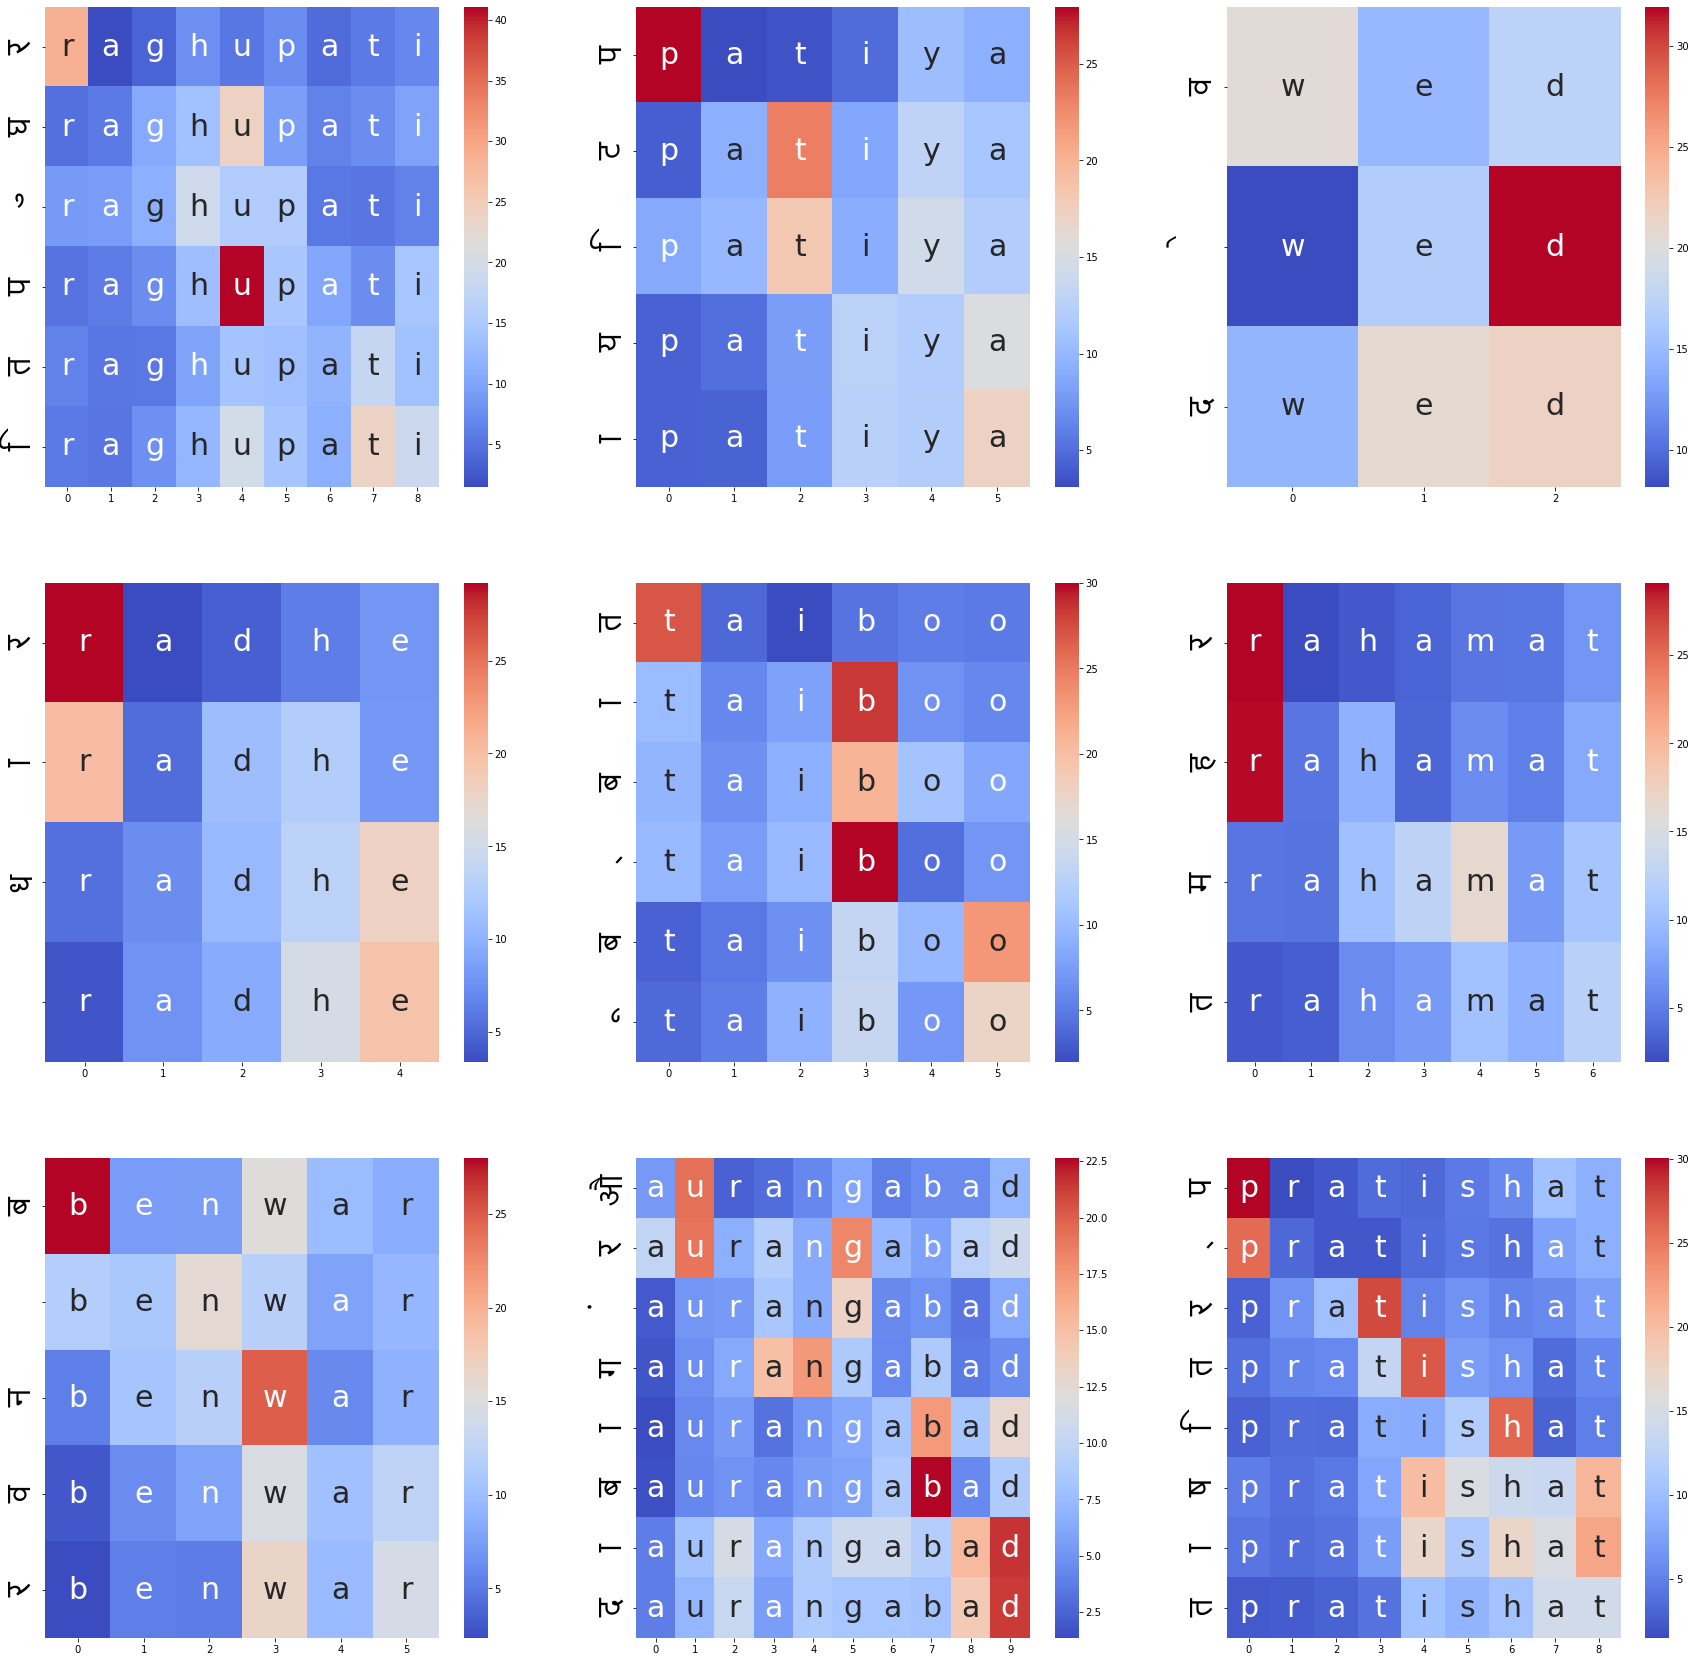

In [95]:
fig, ax = plt.subplots(3, 3,figsize=(30,30))

for i in range(3):
    for j in range(3):
        
        k=index[3*i+j]
        
        annots = np.array([i for i in predsV.iloc[k]['en']])
        annots = np.array([annots]*len(predsV.iloc[k]['hi_preds']))
        new_ax = sns.heatmap(
            connectivity[:len(predsV.iloc[k]['hi_preds']),k,-len(predsV.iloc[k]['en'])-1:-1],
            ax=ax[i][j],
            annot = annots,
            fmt = '',
            cmap='coolwarm',
            annot_kws={"size": 30}
        )
        
        new_ax.set_yticklabels(
            [l for l in predsV.iloc[k]['hi_preds']]
        )
                
        for label in new_ax.get_yticklabels() :
            label.set_fontproperties(fp)
            label.set_fontsize(30)

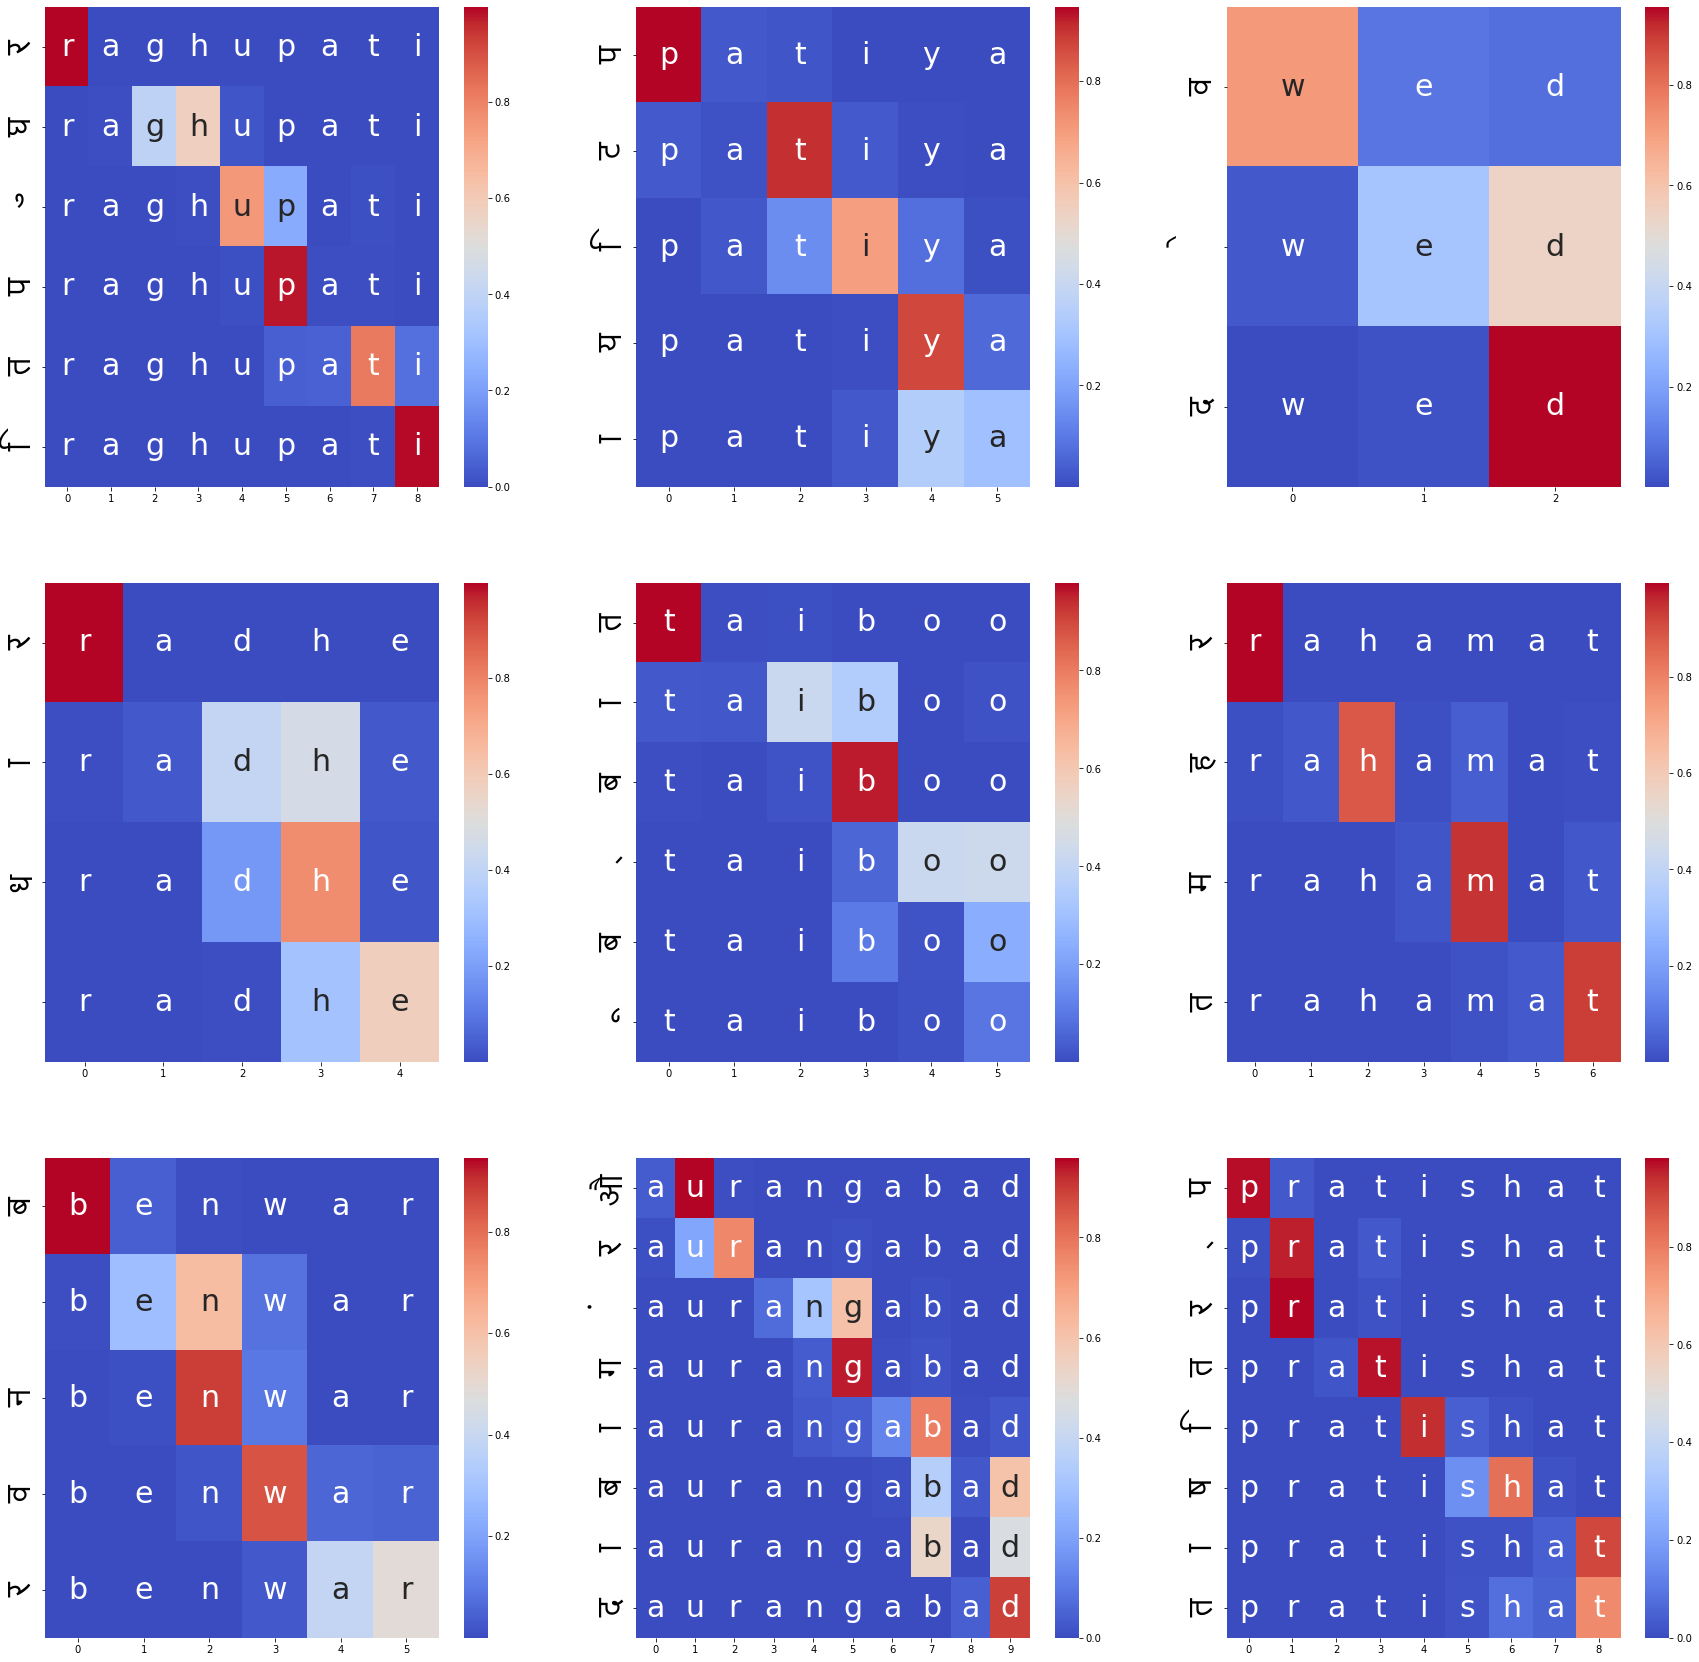

In [94]:
fig, ax = plt.subplots(3, 3,figsize=(30,30))

for i in range(3):
    for j in range(3):
        
        k=index[3*i+j]
        
        annots = np.array([i for i in predsV.iloc[k]['en']])
        annots = np.array([annots]*len(predsV.iloc[k]['hi_preds']))
        new_ax = sns.heatmap(
            attention_scores[k,:len(predsV.iloc[k]['hi_preds']),-len(predsV.iloc[k]['en'])-1:-1],
            ax=ax[i][j],
            annot = annots,
            fmt = '',
            cmap='coolwarm',
            annot_kws={"size": 30}
        )
        
        new_ax.set_yticklabels(
            [l for l in predsV.iloc[k]['hi_preds']]
        )
        
        
        
        
        for label in new_ax.get_yticklabels() :
            label.set_fontproperties(fp)
            label.set_fontsize(30)